<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [71]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [72]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-10 21:54:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-09-10 21:54:43 (14.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [73]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [74]:
df.shape

(346, 10)

### Convert to date time object 

In [75]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [76]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [77]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         156 KB  anaconda

The following packages will be UPDATED:

    certifi:         2019.6.16-py36_1     conda-forge --> 2019.6.16-py36_1 anaconda
    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1-h7b6447c_0 anaconda

The following packages will be DOWNGRADED:

    ca-certificates: 2019.6.16-hecc5488_0 conda-forge --> 2019.5.15-1      anaconda


certifi-2019.6.16    | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


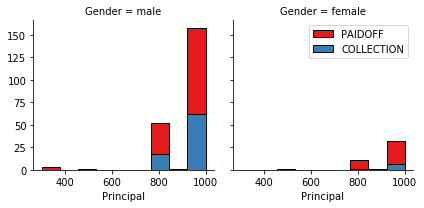

In [78]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

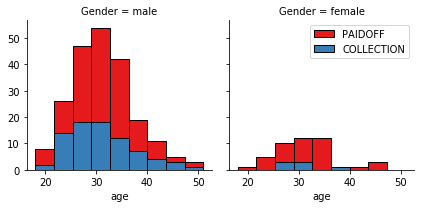

In [79]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

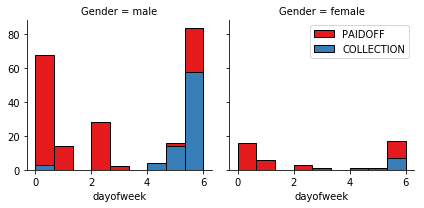

In [80]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [81]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [82]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [83]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [84]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [85]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [86]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [87]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [88]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [89]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

### Train/Test Split 

In [90]:
from sklearn.model_selection import train_test_split
#n_test=np.linspace(0.2,1,num=4,dtype='int16')
#for t in range (1,n_test):
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


### Classification 

#### Selecting the right K

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

#### Plot it

Text(8, 0.8157142857142857, 'Best accuracy = 0.78571 and best K = 7')

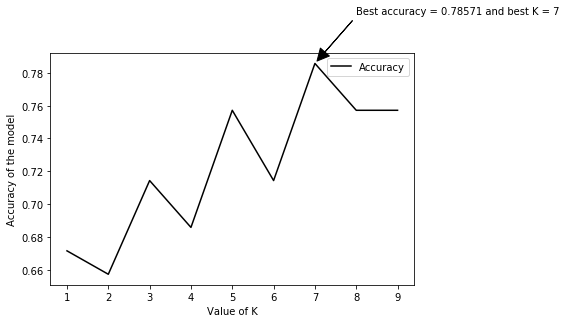

In [92]:
fig=plt.figure()
ax=fig.add_subplot(111)

plt.plot(range(1,Ks),mean_acc,'k')
plt.legend(['Accuracy'],loc='best')
plt.xlabel("Value of K")
plt.ylabel("Accuracy of the model")
plt.tight_layout()

ymax=mean_acc.max()
xmax=mean_acc.argmax()+1
text='Best accuracy = {:.5f} and best K = {:.0f}'.format(ymax,xmax)
ax.annotate(text,xy=(xmax,ymax),xytext=(xmax+1,ymax+0.03), arrowprops=dict(facecolor='black',width=0.05, shrink=0.05))


# Decision Tree

#### Modelling

In [93]:
from sklearn.tree import DecisionTreeClassifier

n=25
avg_accT=np.zeros((n-1))


for i in range (1,n):  
    #parameters of the decision tree
    loanTree_train = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    
    #fit the model
    loanTree_train.fit(X_train,y_train)
    predict=loanTree_train.predict(X_test)
    avg_accT[i-1]=metrics.accuracy_score(y_test,predict)
    print("n iterations",i)
    
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predict))
avg_accT

n iterations 1
n iterations 2
n iterations 3
n iterations 4
n iterations 5
n iterations 6
n iterations 7
n iterations 8
n iterations 9
n iterations 10
n iterations 11
n iterations 12
n iterations 13
n iterations 14
n iterations 15
n iterations 16
n iterations 17
n iterations 18
n iterations 19
n iterations 20
n iterations 21
n iterations 22
n iterations 23
n iterations 24
DecisionTrees's Accuracy:  0.7


array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286, 0.7       ,
       0.7       , 0.71428571, 0.71428571, 0.72857143, 0.72857143,
       0.7       , 0.7       , 0.7       , 0.68571429, 0.68571429,
       0.7       , 0.68571429, 0.7       , 0.7       ])

#### Plot the accuracy of the models

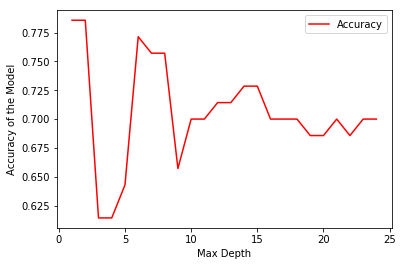

Text(1.5, 0.8857142857142857, 'Best accuracy = 0.78571 and best K = 1')

<Figure size 432x288 with 0 Axes>

In [94]:
fig=plt.figure()
ax=fig.add_subplot(111)

plt.plot(range(1,n),avg_accT,'r')
plt.legend(['Accuracy'],loc='best')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy of the Model")
plt.show()
plt.tight_layout()

#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

ymax=avg_accT.max()
xmax=avg_accT.argmax()+1
text='Best accuracy = {:.5f} and best K = {:.0f}'.format(ymax,xmax)
ax.annotate(text,xy=(xmax,ymax),xytext=(xmax+0.5,ymax+0.1), arrowprops=dict(facecolor='black',width=0.05, shrink=0.05))

#### Print

In [95]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-1      anaconda --> 2019.6.16-hecc5488_0 conda-forge
    certifi:         2019.6.16-py36_1 anaconda --> 2019.6.16-py36_1     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1-h7b6447c_0 anaconda --> 1.1.1c-h516909a_0    conda-forge


certifi-2019.6.16    | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.



#### Plot the Decision Tree for the best max depth (max depth=2)

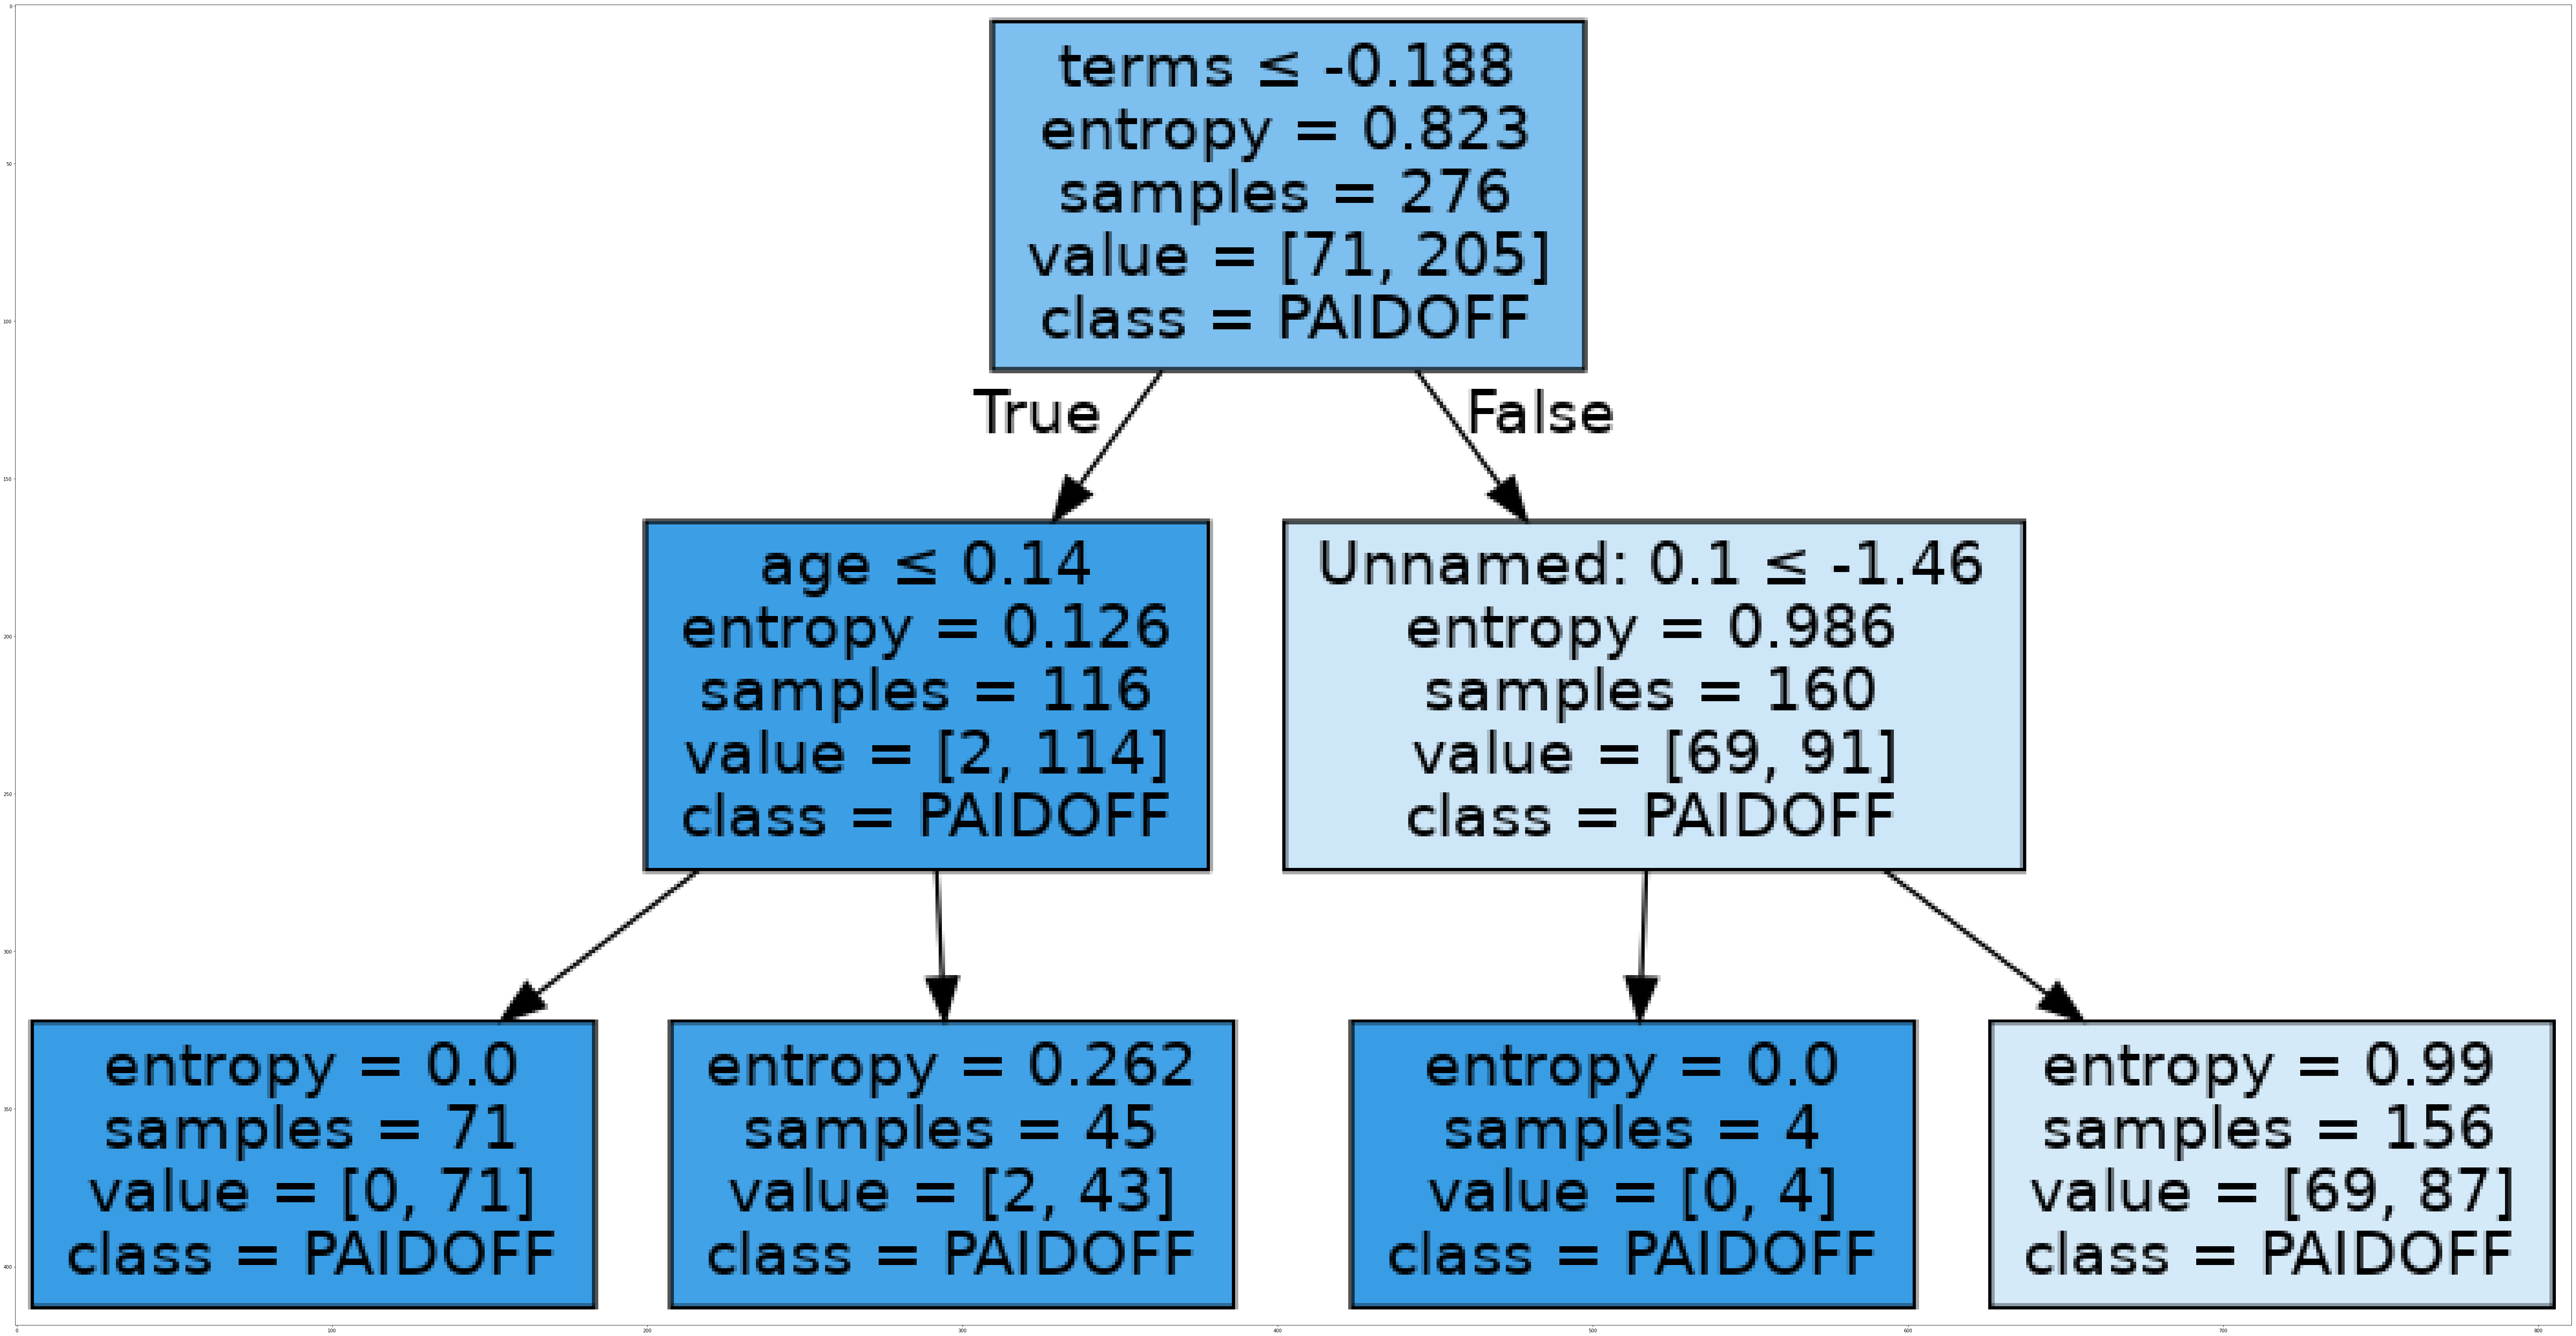

In [96]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
#fit the model
loanTree.fit(X_train,y_train)
predict=loanTree.predict(X_test)
avg_accT[i-1]=metrics.accuracy_score(y_test,predict)

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "loantree.png"
featureNames = df.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

#### Find the best kernelling function

In [97]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

kernelling=['linear','rbf','poly','sigmoid']
k=len(kernelling)
f1=np.zeros((k))
jacc=np.zeros((k))
mean_accuracy=np.zeros((k))

for j in range (0,k): 
    clf = svm.SVC(kernel=kernelling[j],gamma="auto")
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    f1[j]=f1_score(y_test, yhat, average='weighted',labels=np.unique(yhat)) 
    jacc[j]=jaccard_similarity_score(y_test, yhat)
    # calculate the mean between f1-score and jaccard 
    mean_accuracy[j]=(f1[j]+jacc[j])/2    

print("The f1 score is:", f1)
print("The jaccard score is:", jacc)
pos=mean_accuracy.argmax()
print("The best kernelling function is:", kernelling[pos])


The f1 score is: [0.88       0.7275882  0.70647931 0.68928571]
The jaccard score is: [0.78571429 0.74285714 0.77142857 0.74285714]
The best kernelling function is: linear


# Logistic Regression

In [283]:
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
c_list=[1,0.5,0.1,0.01,0.001]
function=['liblinear','saga','newton-cg','sag','lbfgs']
k=len(function)

f1=[]
jac=[]
log=[]
solv=[]


#jacc=np.zeros((k))
#logloss=np.zeros((k))
#avg_log=np.zeros((k))

for i, sol in enumerate(function):
    for j, c in enumerate(c_list):
        LR = LogisticRegression(C=c,solver=sol).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)
        
        print("Test:",j+i*5,"Solver is:",sol,"C is:",c,"F1-Score is:",f1_score(y_test, yhat, average='weighted',labels=np.unique(yhat)))
        
        f1.append(f1_score(y_test, yhat, average='weighted',labels=np.unique(yhat)))
        jac.append(jaccard_similarity_score(y_test, yhat))
        log.append(log_loss(y_test, yhat_prob))
        solv.append(sol)
        
        #f1[i]=f1_score(y_test, yhat, average='weighted',labels=np.unique(yhat))f1_score(y_test, yhat, average='weighted',labels=np.unique(yhat) )
        #jacc[i]=c
        #logloss[i]=log_loss(y_test, yhat_prob)

#print("The best solver is:", function[avg_log.argmax()],"pos",avg_log.argmax())

Test: 0 Solver is: liblinear C is: 1 F1-Score is: 0.685960591133005
Test: 1 Solver is: liblinear C is: 0.5 F1-Score is: 0.6953867388649997
Test: 2 Solver is: liblinear C is: 0.1 F1-Score is: 0.7048206031256878
Test: 3 Solver is: liblinear C is: 0.01 F1-Score is: 0.6670522459996144
Test: 4 Solver is: liblinear C is: 0.001 F1-Score is: 0.6752209022111361
Test: 5 Solver is: saga C is: 1 F1-Score is: 0.6953867388649997
Test: 6 Solver is: saga C is: 0.5 F1-Score is: 0.7048206031256878
Test: 7 Solver is: saga C is: 0.1 F1-Score is: 0.7064793130366899
Test: 8 Solver is: saga C is: 0.01 F1-Score is: 0.88
Test: 9 Solver is: saga C is: 0.001 F1-Score is: 0.88
Test: 10 Solver is: newton-cg C is: 1 F1-Score is: 0.6953867388649997
Test: 11 Solver is: newton-cg C is: 0.5 F1-Score is: 0.7048206031256878
Test: 12 Solver is: newton-cg C is: 0.1 F1-Score is: 0.7064793130366899
Test: 13 Solver is: newton-cg C is: 0.01 F1-Score is: 0.88
Test: 14 Solver is: newton-cg C is: 0.001 F1-Score is: 0.88
Test: 15 

Best metric is: Log-Loss


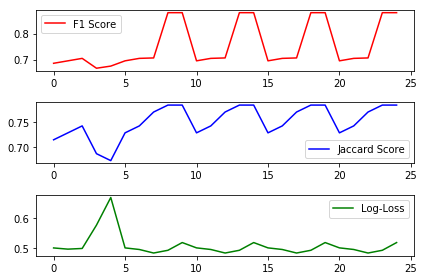

In [268]:
fig, (ax1, ax2,ax3) = plt.subplots(3)

ax1.plot(f1, color='r', label='F1 Score')
ax1.legend(loc="best")
ax2.plot(jac, color='b', label='Jaccard Score')
ax2.legend(loc="best")
ax3.plot(log, color='g', label='Log-Loss')
ax3.legend(loc="best")

plt.tight_layout()

print("Best metric is: Log-Loss")

#### Determine the Best solver

In [309]:
c_list=[3,2,1,0.5,0.1]
function=['liblinear','saga','newton-cg','sag','lbfgs']
k=len(function)

log=[]
solv=[]
max_acc=[]
max_val=np.zeros(k)

#jacc=np.zeros((k))
#logloss=np.zeros((k))
#avg_log=np.zeros((k))

for j, c in enumerate(c_list):
    for i, sol in enumerate(function):
        LR = LogisticRegression(C=c,solver=sol).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)
        
        print("Test=",i+j*5,"Solver is:",sol,"C is:",c,"Log-Loss is:",log_loss(y_test, yhat_prob))
        log.append(log_loss(y_test, yhat_prob))
        #max_acc.append(max(log))
        solv.append(sol)
        
print("\n","The best Log-Loss is the the lowest, in this case:",min(log),"which belongs to test:",log.index(min(log)))

Test= 0 Solver is: liblinear C is: 3 Log-Loss is: 0.50835436073811
Test= 1 Solver is: saga C is: 3 Log-Loss is: 0.5079813518874339
Test= 2 Solver is: newton-cg C is: 3 Log-Loss is: 0.508894644195873
Test= 3 Solver is: sag C is: 3 Log-Loss is: 0.5088124937208277
Test= 4 Solver is: lbfgs C is: 3 Log-Loss is: 0.508893300804278
Test= 5 Solver is: liblinear C is: 2 Log-Loss is: 0.5050538532455663
Test= 6 Solver is: saga C is: 2 Log-Loss is: 0.5053158652523868
Test= 7 Solver is: newton-cg C is: 2 Log-Loss is: 0.5056161984331973
Test= 8 Solver is: sag C is: 2 Log-Loss is: 0.5055606621252318
Test= 9 Solver is: lbfgs C is: 2 Log-Loss is: 0.5056156652506328
Test= 10 Solver is: liblinear C is: 1 Log-Loss is: 0.4999471617580585
Test= 11 Solver is: saga C is: 1 Log-Loss is: 0.500112941978702
Test= 12 Solver is: newton-cg C is: 1 Log-Loss is: 0.5001813800859983
Test= 13 Solver is: sag C is: 1 Log-Loss is: 0.5001519175768829
Test= 14 Solver is: lbfgs C is: 1 Log-Loss is: 0.5001817646359401
Test= 15 S

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### The lowest Log-Loss(best value) was obtained in test 21, with solver 'saga' and C=0.1

Text(0, 0.5, 'Log-Loss')

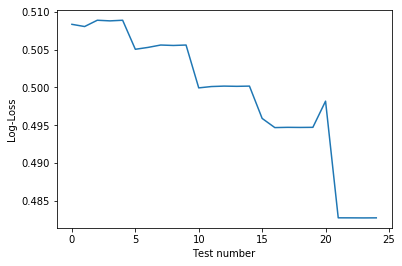

In [301]:
plt.plot(range(0,25,1),log)
plt.xlabel("Test number")
plt.ylabel("Log-Loss")

# Model Evaluation using Test set

In [99]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [100]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-09-10 22:07:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-09-10 22:07:56 (348 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [101]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [102]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [103]:
test_X = test_Feature
test_y = test_df['loan_status'].values
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [104]:
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

### KNN Evaluation

In [105]:
k = 7
#Train Model and Predict  
KNN_neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)
KNN_yhat = KNN_neigh.predict(test_X)

In [106]:
KNN_mean_acc = metrics.accuracy_score(test_y, KNN_yhat)
KNN_mean_acc

0.7222222222222222

In [107]:
KNN_Jaccard = jaccard_similarity_score(test_y, KNN_yhat)
KNN_Jaccard

0.7222222222222222

In [108]:
from sklearn.metrics import f1_score
KNN_f1 = f1_score(test_y, KNN_yhat, average='weighted')
KNN_f1

0.7001989201477693

### Decision Tree Evaluation

In [109]:
DT_loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
DT_loanTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
DT_predTree = DT_loanTree.predict(test_X)
DT_Jaccard = jaccard_similarity_score(test_y,DT_predTree)
DT_Jaccard

0.7407407407407407

In [111]:
DT_f1 = f1_score(test_y,DT_predTree,average='weighted')
DT_f1

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6304176516942475

### SVM Evaluation

In [112]:
SVM_clf = svm.SVC(kernel='linear',gamma= 'auto')
SVM_clf.fit(X,y) 
SVM_yhat = clf.predict(test_X)
SVM_Jaccard = jaccard_similarity_score(test_y, SVM_yhat)
SVM_Jaccard

0.7037037037037037

In [113]:
SVM_f1 = f1_score(test_y, SVM_yhat, average='weighted')
SVM_f1

0.6378600823045267

### Logistic Regression Evaluation

In [310]:
LR_LR = LogisticRegression(C=0.1, solver='saga').fit(X,y)
LR_yhat = LR_LR.predict(test_X)

In [311]:
LR_Jaccard = jaccard_similarity_score(test_y, LR_yhat)
LR_Jaccard

0.7407407407407407

In [312]:
LR_f1 = f1_score(test_y, LR_yhat, average='weighted')
LR_f1

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6304176516942475

In [313]:
LR_yhat_prob = LR_LR.predict_proba(test_X)

In [314]:
from sklearn.metrics import log_loss
LR_log_loss = log_loss(test_y, LR_yhat_prob)
LR_log_loss

0.47735483639881643

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [316]:
Algorithm=['KNN', 'Decision Tree','SVM','Logistic Regression']

Jaccard=[round(KNN_Jaccard,6),round(DT_Jaccard,6),round(SVM_Jaccard,6),round(LR_Jaccard,6)]

F1_Score=[round(KNN_f1,6),round(DT_f1,6),round(SVM_f1,6),round(LR_f1,6)]

LogLoss=['NA','NA','NA',round(LR_log_loss,6)]

table=pd.DataFrame({"Algorithm": Algorithm,"Jaccard":Jaccard,"F1-Score":F1_Score,"LogLoss":LogLoss})
table

,Algorithm,Jaccard,F1-Score,LogLoss
0,KNN,0.722222,0.700199,NA
1,Decision Tree,0.740741,0.630418,NA
2,SVM,0.703704,0.637860,NA
3,Logistic Regression,0.740741,0.630418,0.477355


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>